## Created by : Abdul Wajid

 ## Exploratory Data Analysis - Global Terrorism

###Aim: 
*   To find out the hot zone of terrorism.
*   Extract all security issues and insights present in the given data.





### Importing Required Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)
pd.set_option('display.max_rows',50)

df = pd.read_csv('/content/drive/MyDrive/Sparks_Internship/dataset.csv', low_memory = False ,encoding = 'latin1')
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country         country_txt  region                   region_txt provstate           city   latitude   longitude  specificity  vicinity location summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  ...  nhostkid  nhostkidus  nhours  ndays divert  kidhijcountry ransom  ransomamt ransomamtus  ransompaid ransompaidus  ransomnote hostkidoutcome hostkidoutcome_txt nreleased  addnotes scite1  scite2 scite3  dbsource INT_LOG INT_IDEO INT_MISC  INT_ANY related
0  197000000001   1970       7     2        NaN         0        NaN       58  Dominican Republic       2  Central America & Caribbean       NaN  Santo Domingo  18.456792  -69.951164          1.0         0      NaN     NaN      1      1      1        0.0          NaN             NaN  ...       NaN         NaN     NaN    NaN    NaN            NaN    0.0        NaN         NaN         NaN          NaN         NaN            NaN                NaN       NaN       NaN    NaN     NaN    NaN      PGIS       0        0        0        0     NaN
1  197000000002   1970       0     0        NaN         0        NaN      130              Mexico       1                North America   Federal    Mexico city  19.371887  -99.086624          1.0         0      NaN     NaN      1      1      1        0.0          NaN             NaN  ...       1.0         0.0     NaN    NaN    NaN         Mexico    1.0   800000.0         NaN         NaN          NaN         NaN            NaN                NaN       NaN       NaN    NaN     NaN    NaN      PGIS       0        1        1        1     NaN
2  197001000001   1970       1     0        NaN         0        NaN      160         Philippines       5               Southeast Asia    Tarlac        Unknown  15.478598  120.599741          4.0         0      NaN     NaN      1      1      1        0.0          NaN             NaN  ...       NaN         NaN     NaN    NaN    NaN            NaN    0.0        NaN         NaN         NaN          NaN         NaN            NaN                NaN       NaN       NaN    NaN     NaN    NaN      PGIS      -9       -9        1        1     NaN
3  197001000002   1970       1     0        NaN         0        NaN       78              Greece       8               Western Europe    Attica         Athens  37.997490   23.762728          1.0         0      NaN     NaN      1      1      1        0.0          NaN             NaN  ...       NaN         NaN     NaN    NaN    NaN            NaN    0.0        NaN         NaN         NaN          NaN         NaN            NaN                NaN       NaN       NaN    NaN     NaN    NaN      PGIS      -9       -9        1        1     NaN
4  197001000003   1970       1     0        NaN         0        NaN      101               Japan       4                    East Asia   Fukouka        Fukouka  33.580412  130.396361          1.0         0      NaN     NaN      1      1      1       -9.0          NaN             NaN  ...       NaN         NaN     NaN    NaN    NaN            NaN    0.0        NaN         NaN         NaN          NaN         NaN            NaN                NaN       NaN       NaN    NaN     NaN    NaN      PGIS      -9       -9        1        1     NaN

[5 rows x 135 columns]

### Keeping selected attributes for maximum usefull insights

In [3]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','latitude':'Latitude','longitude':'Longitude','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [4]:
df_selected = df [['Year','Month','Day','Country','state','Region','city','Latitude','Longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
df_selected.describe()

Year          Month            Day       Latitude     Longitude         Killed        Wounded
count  181691.000000  181691.000000  181691.000000  177135.000000  1.771340e+05  171378.000000  165380.000000
mean     2002.638997       6.467277      15.505644      23.498343 -4.586957e+02       2.403272       3.167668
std        13.259430       3.388303       8.814045      18.569242  2.047790e+05      11.545741      35.949392
min      1970.000000       0.000000       0.000000     -53.154613 -8.618590e+07       0.000000       0.000000
25%      1991.000000       4.000000       8.000000      11.510046  4.545640e+00       0.000000       0.000000
50%      2009.000000       6.000000      15.000000      31.467463  4.324651e+01       0.000000       0.000000
75%      2014.000000       9.000000      23.000000      34.685087  6.871033e+01       2.000000       2.000000
max      2017.000000      12.000000      31.000000      74.633553  1.793667e+02    1570.000000    8191.000000

##  Finding Missing values and replacing them to reduce loss of usefull information

In [5]:
df_selected.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [6]:
def replace_null(dataset): 
    df = dataset.isnull().sum()
    df_p = 100 * dataset.isnull().sum()/len(dataset)
    df_ = pd.concat([df, df_p], axis=1)
    df_percentage = df_.rename(
    columns = {0 : 'Null Values', 1 : 'Percentage '})
    return df_percentage
    
replace_null(df_selected)

Null Values  Percentage 
Year                   0     0.000000
Month                  0     0.000000
Day                    0     0.000000
Country                0     0.000000
state                421     0.231712
Region                 0     0.000000
city                 434     0.238867
Latitude            4556     2.507554
Longitude           4557     2.508104
AttackType             0     0.000000
Killed             10313     5.676120
Wounded            16311     8.977330
Target               636     0.350045
Summary            66129    36.396409
Group                  0     0.000000
Target_type            0     0.000000
Weapon_type            0     0.000000
Motive            131130    72.171984

In [7]:
df_selected['state'].fillna(value='NA', inplace=True)
df_selected['Target'].fillna(value='NA', inplace=True)
df_selected['city'].fillna(value='NA', inplace=True)
df_selected["Latitude"].fillna(df_selected["Latitude"].mean(), inplace=True)
df_selected["Longitude"].fillna(df_selected["Longitude"].mean(), inplace=True)
df_selected["Killed"].fillna(int(df_selected["Killed"].mean()), inplace=True)
df_selected["Wounded"].fillna(df_selected["Wounded"].mean(), inplace=True)
df_selected['Summary'].fillna(value='NA', inplace=True)
df_selected['Motive'].fillna(value='NA', inplace=True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Terrorist Attacks over the years

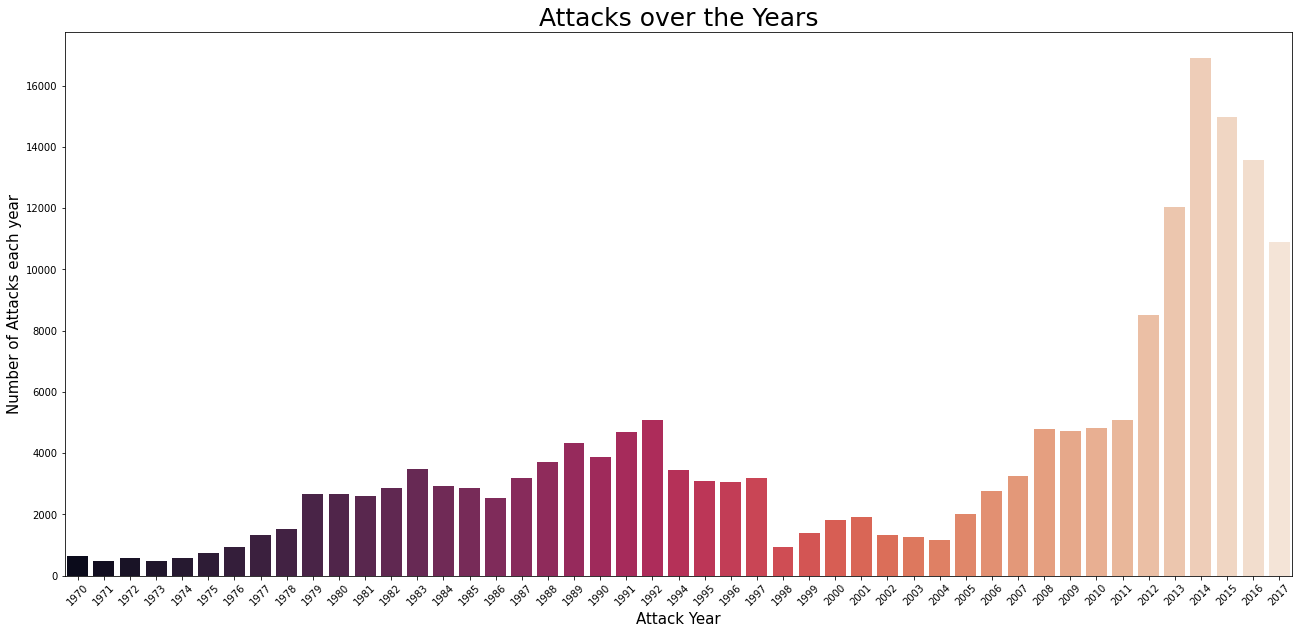

In [ ]:
x = df_selected['Year'].unique()
y = df_selected['Year'].value_counts(dropna = False).sort_index()

plt.figure(figsize = (22,10))
sns.barplot(x = x,
           y = y,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year',fontsize=15)
plt.ylabel('Number of Attacks each year',fontsize=15)
plt.title('Attacks over the Years',fontsize=25)
plt.show()



* There has been a gradual increase in Terrorists Attacks since 2004
* 2014 have seen highest number of attacks.
* There also a gradual decrease in Terrorists Attacks after 2014





## World Attacks Overview

In [ ]:
country_data = df_selected.groupby(['Country'],as_index=False).count()
fig = px.choropleth(ter, locations='Country',locationmode='country names',
                    color='Year',hover_name='Country',projection='orthographic',
                    title='Terrorist Attacks Country-wise', labels={'Year':'Attacks'})
fig.show()

Fully interactive world map




*   Bordered countries mapped by color depending on number of attacks
*   Middle eastern ,South Asia and South American countries have significantly higher number of attacks. 





## Terrorist Attacks Hot Zones

In [9]:
map_data = df_selected[['Country','Latitude','Longitude','Killed']]
map_data = map_data.dropna()
map_data

Country   Latitude   Longitude  Killed
0       Dominican Republic  18.456792  -69.951164     1.0
1                   Mexico  19.371887  -99.086624     0.0
2              Philippines  15.478598  120.599741     1.0
3                   Greece  37.997490   23.762728     2.0
4                    Japan  33.580412  130.396361     2.0
...                    ...        ...         ...     ...
181686             Somalia   2.359673   45.385034     1.0
181687               Syria  35.407278   35.942679     2.0
181688         Philippines   6.900742  124.437908     0.0
181689               India  24.798346   93.940430     0.0
181690         Philippines   7.209594  124.241966     0.0

[181691 rows x 4 columns]

In [10]:
fig = px.density_mapbox(map_data, lat= 'Latitude', lon = 'Longitude', z = 'Killed', radius=10, center = dict(lat=10,lon=9), zoom = 1 , hover_name="Country",
                        mapbox_style='stamen-watercolor',title= 'Terrorist Attacks Hot Zones')
fig.show()

Fully interactive map



*   Hot Zones intensity can be seen over Middle East ,South Asia and South American countries followed by others
*   Number of people killed in each location with exact area 





## Most frequent locations of terrorist attacks

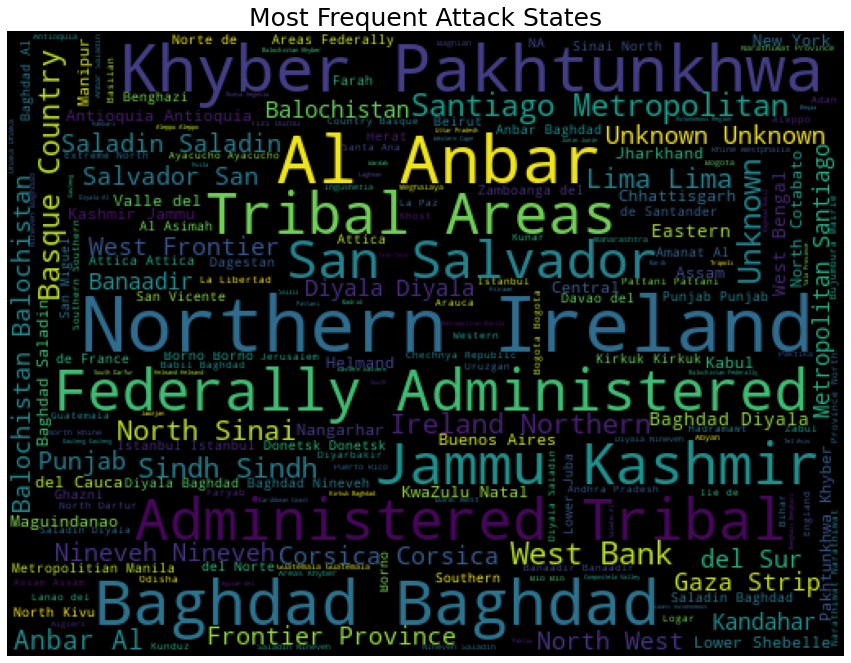

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities = df_selected.state.dropna(False)
plt.subplots(figsize=(15,15))
wordcloud=WordCloud(background_color='black',width=512,height=382).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Most Frequent Attack States",fontsize=25)
plt.show()

From above chart we can conclude that

*  The states like Northern Ireland, Baghdad,Al anbur, khyber Pakhtunkhwa, Jammu Kashmir are the state swith most frequent attacks

## Most Affected Countries

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



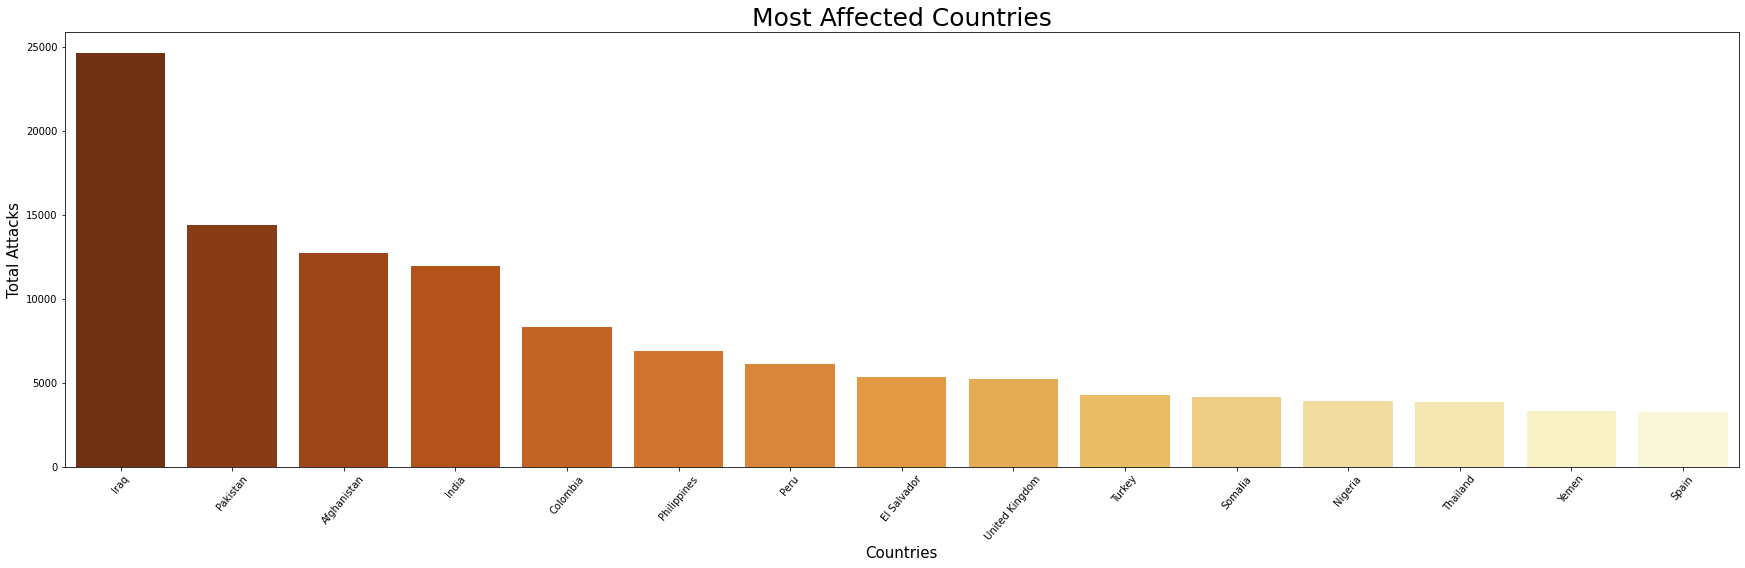

In [ ]:
plt.subplots(figsize=(30,8))
sns.barplot(df_selected['Country'].value_counts()[:15].index,df_selected['Country'].value_counts()[:15].values,palette='YlOrBr_r')
plt.title('Most Affected Countries',fontsize=25)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Total Attacks',fontsize=15)
plt.xticks(rotation= 50)
plt.show()

According to this research

*  Iraq is the most affected country by terrorism
*  Followed by Pakistan and Afghanistan with more than 10000 attacks.

## Most Attacked regions and cities

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



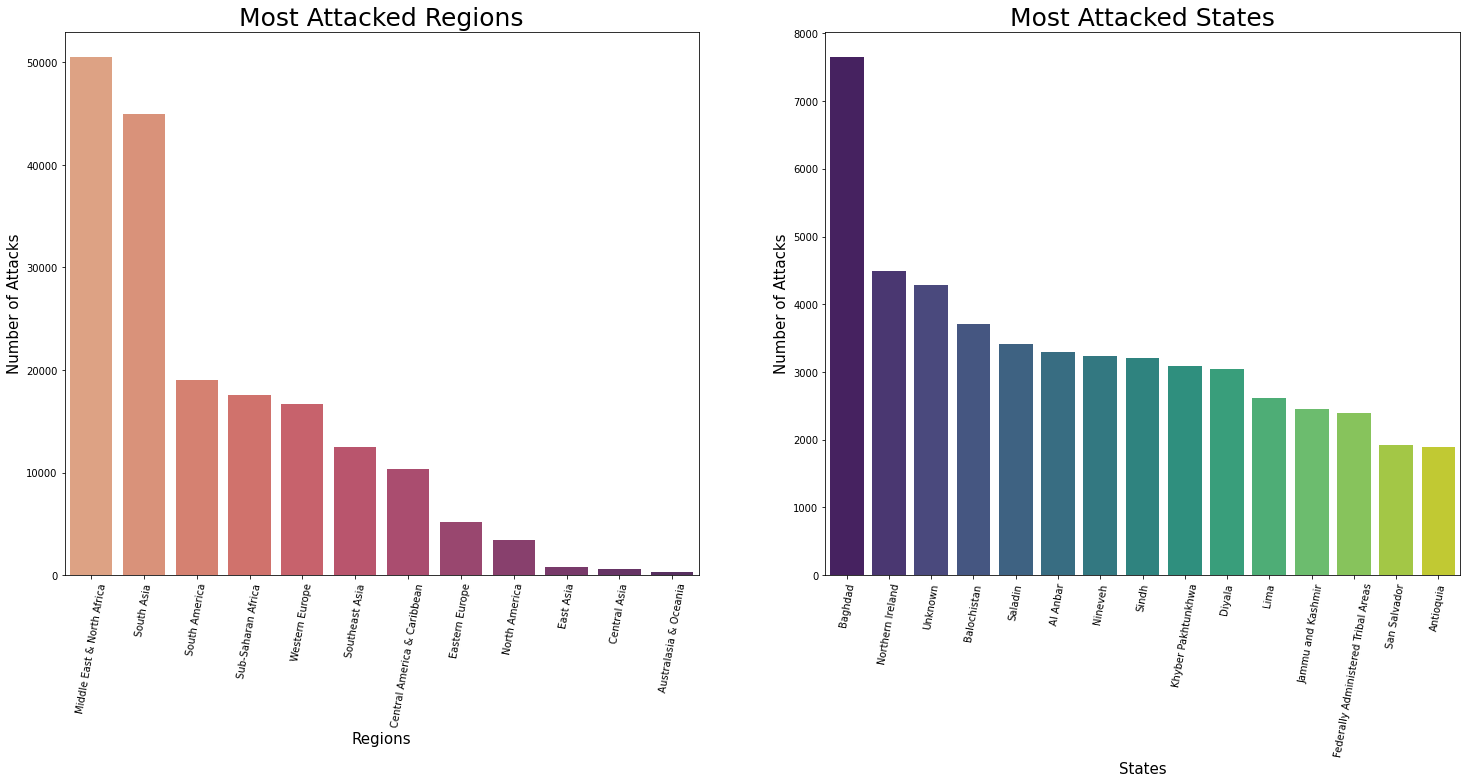

In [ ]:
plt.subplot(1,2,1)

sns.barplot(df_selected['Region'].value_counts().index, df_selected['Region'].value_counts().values,palette='flare')
plt.title('Most Attacked Regions',fontsize=25)
plt.xlabel('Regions',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=80)

plt.subplot(1,2,2)
sns.barplot(df_selected['state'].value_counts().head(15).index, df_selected['state'].value_counts().head(15).values,palette='viridis')
plt.title('Most Attacked States',fontsize=25)
plt.xlabel('States',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=80)
plt.gcf().set_size_inches(25, 10)

With these Graphs, we can conclude that

*   Most Attacked Region is Middle East,South Asia and South America followed by Africa.
*   Most Attacked States is Baghdad with significantly higher attacks than an others.



## Different attack types used by terrorists

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



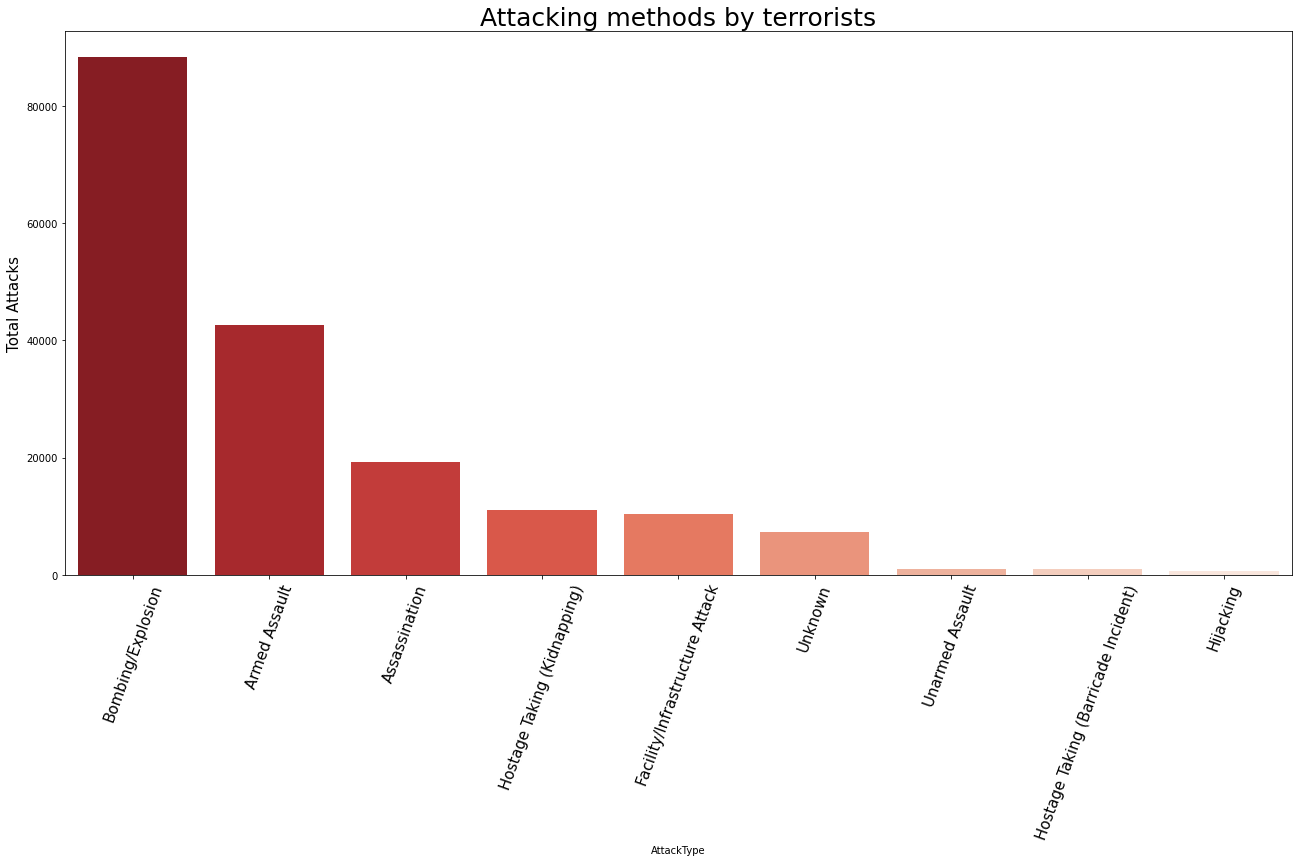

In [ ]:
plt.subplots(figsize=(22,10))
sns.countplot('AttackType',data=df_selected,palette='Reds_r',order=df_selected['AttackType'].value_counts().index)
plt.xticks(rotation=70,fontsize=15)
plt.ylabel('Total Attacks',fontsize=15)
plt.title('Attacking methods by terrorists',fontsize=25)
plt.show()

According to this research we can conclude that


* Bombing/Explosion are the most used types of attacks carried out by terrorist 
* Followed by Armed Assualt and Assassinations.

## Most frequent targets

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



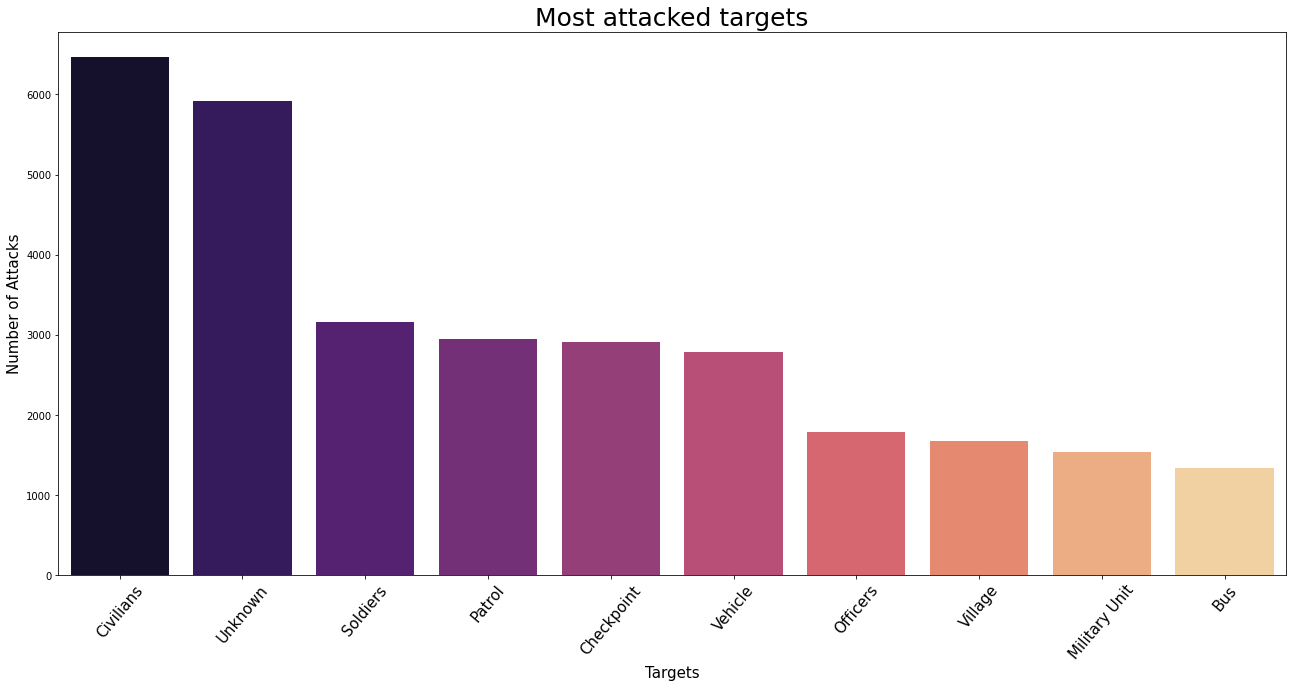

In [ ]:
plt.figure(figsize = (22,10))
sns.barplot(df_selected['Target'].value_counts().head(10).index, df_selected['Target'].value_counts().head(10).values, 
            palette='magma')
plt.title('Most attacked targets',fontsize=25)
plt.xlabel('Targets',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=50,fontsize= 15)
plt.show()

With these Graphs, we can conclude that

*   Terrorist attacks caused civilians the most number of lifes 
*   Followed by unknowns/unverified bodies and soldiers.


### Most frequent target types

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



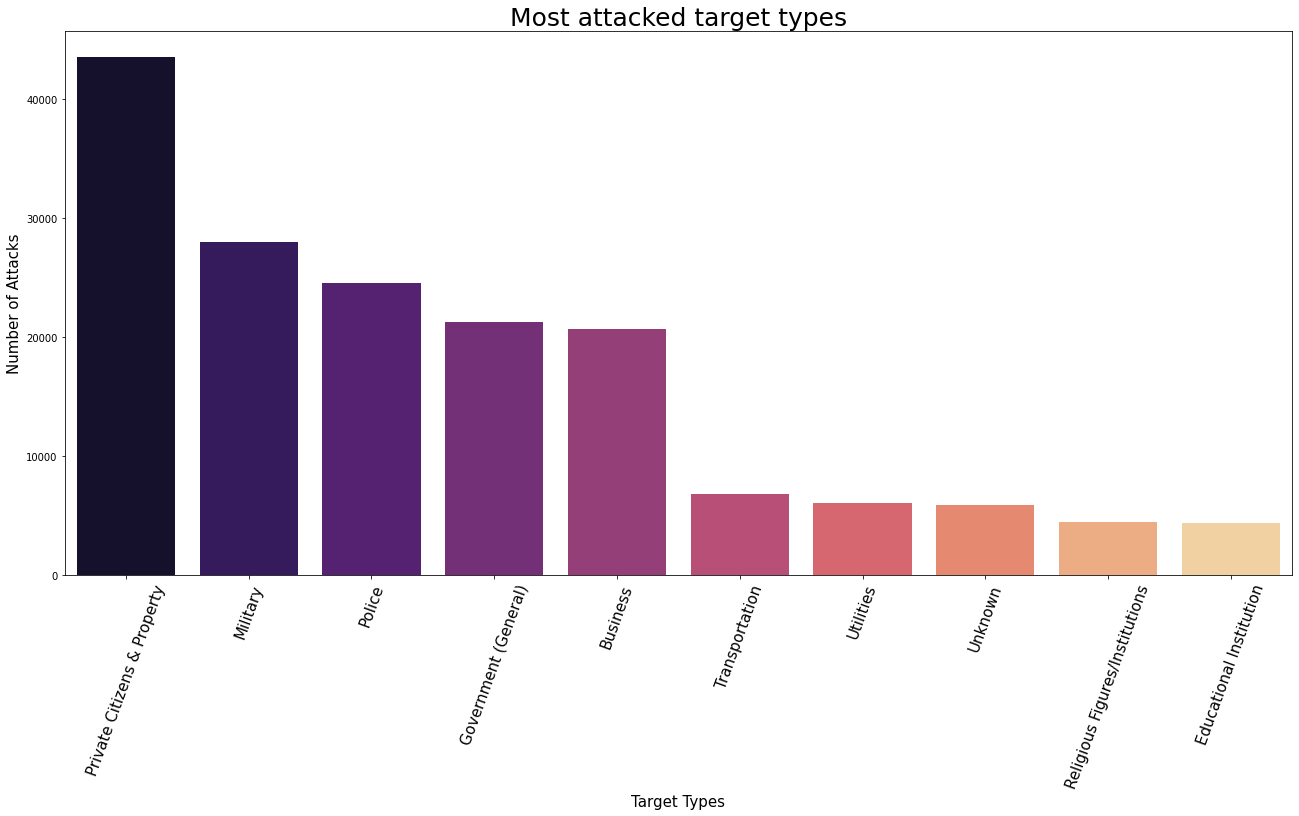

In [ ]:
plt.figure(figsize = (22,10))
sns.barplot(df_selected['Target_type'].value_counts().head(10).index, df_selected['Target_type'].value_counts().head(10).values, 
            palette='magma')
plt.title('Most attacked target types',fontsize=25)
plt.xlabel('Target Types',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=70,fontsize=15)
plt.show()

According to this research we can conclude that


* Attacks caused Private citizen properties the most damage
* Followed by actual military and police properties 



## Most Number of Attacks by terrorist Groups

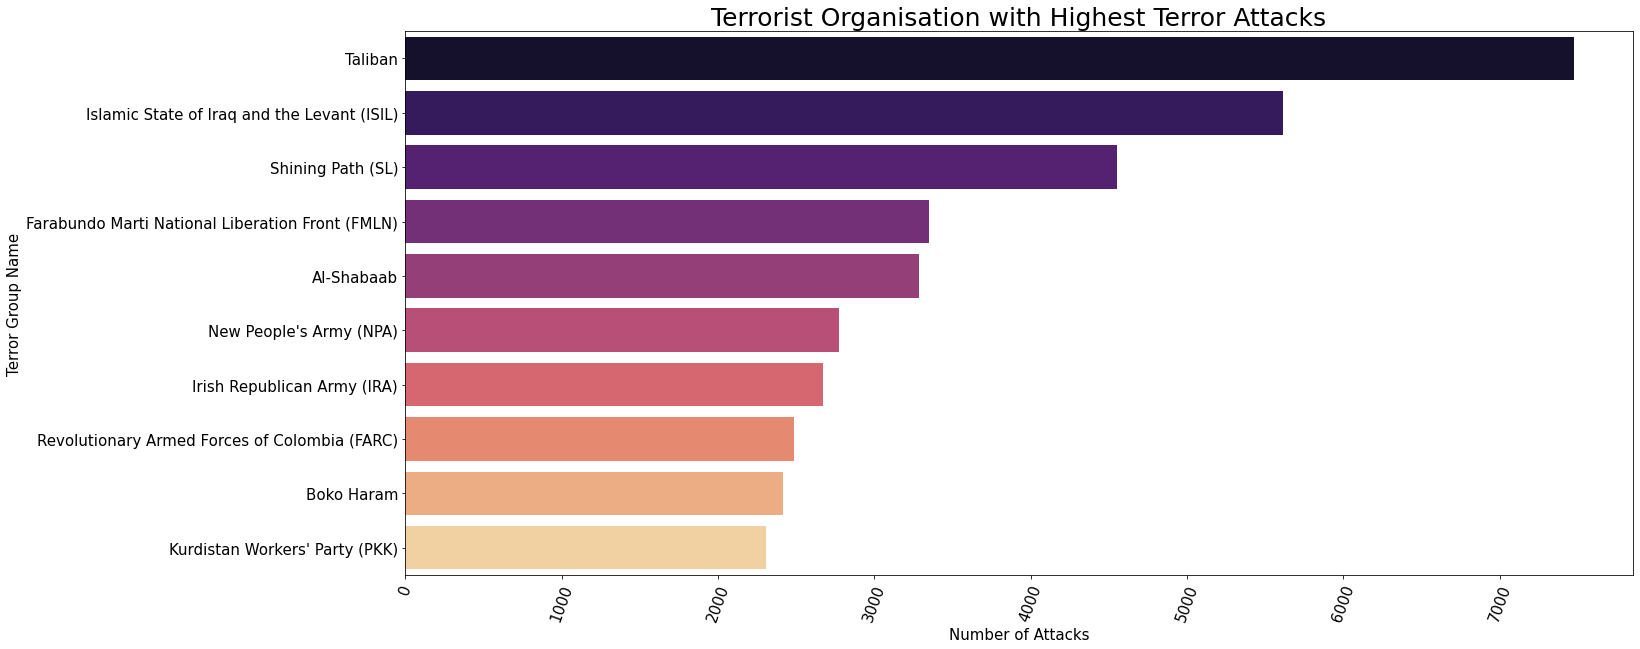

In [ ]:
plt.figure(figsize = (22,10))
sns.barplot(x =df_selected['Group'].value_counts()[1:11].values, y = df_selected['Group'].value_counts()[1:11].index,palette='magma')
plt.title('Terrorist Organisation with Highest Terror Attacks',fontsize=25)
plt.ylabel('Terror Group Name',fontsize=15)
plt.xlabel('Number of Attacks',fontsize=15)
plt.xticks(rotation= 70,fontsize=15)
plt.yticks(fontsize=15)
plt.show()


*   The Taliban Group is the top terrorist attack group
*   Followed by ISIL and SL causing more tha 50% of attacks



## Direct Insights

In [ ]:
print("Country with the most attacks: ",df_selected['Country'].value_counts().idxmax())
print("Total deaths:",int(df_selected['Killed'].sum()))
print("Region with the most attacks:",df_selected['Region'].value_counts().idxmax())
print("Year with the most attacks:",df_selected['Year'].value_counts().idxmax())
print("Month with the most attacks:",df_selected['Month'].value_counts().idxmax())
print("Terrorist Group with the most attacks:",df_selected['Group'].value_counts().index[1])
print("Most Attack Type:",df_selected['AttackType'].value_counts().idxmax())
print("Maximum number of people that were killed by a single terrorist attack are",df_selected['Killed'].max(),"in",df_selected.loc[df_selected['Killed'].idxmax()].Country)

Country with the most attacks:  Iraq
Total deaths: 411868
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Terrorist Group with the most attacks: Taliban
Most Attack Type: Bombing/Explosion
Maximum number of people that were killed by a single terrorist attack are 1570.0 in Iraq


## CONCLUSION


To conclude, after performing the Exploratory Data Analysis we get the following insights from the data:


* Hot zone of terrorist according to State - Northern ireland, Country - Iraq, Region - Middle east and North Africa, City - Baghdad
* In the last decade 2014 had most number of terror attacks. That was around 16500 attacks during this year which means on average 45 attacks per day.
* Most frequent target of terrorist are Private citizens and Private properties followed by Military, Police, Government and so on.
* Most used method for attacking is Explosions/Bombing followed by Armed assault
* Attacks in Middle east & North africa are exponentially increased after 2004 as well as in Central Asia
* Iraq was the country which was most affected by terror attacks and had maximum number of killed and wounded people.
* Most common weapon used in attacks are Explosives
* Most active Terrorist Group is Taliban
